#  P9: ETUDE DE MARCHÉ AVEC PYTHON

### CHARGEMENT DE LIBRAIRIE

In [211]:
# Librairies de calcul:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import statsmodels
from functools import reduce    

# Libairies de representation graphique:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import plotly.graph_objects as go


# Pour le K-mean:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

import warnings
warnings.filterwarnings('ignore')

# I/ PRÉPARATION ET NETTOYAGE DES DONNÉES

   ## A/ CHARGEMENT DOSSIER FOURNIE DISPONIBILITÉ ALIMENTAIRE 2017

In [212]:
dispo_alim_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
dispo_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


### Choix uniquement des Produits Viande de volaille

In [213]:
volaille = dispo_alim_2017.loc[dispo_alim_2017['Produit']==  'Viande de Volailles']
volaille.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [214]:
volaille.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 651 to 176400
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2061 non-null   object 
 1   Domaine                 2061 non-null   object 
 2   Code zone               2061 non-null   int64  
 3   Zone                    2061 non-null   object 
 4   Code Élément            2061 non-null   int64  
 5   Élément                 2061 non-null   object 
 6   Code Produit            2061 non-null   int64  
 7   Produit                 2061 non-null   object 
 8   Code année              2061 non-null   int64  
 9   Année                   2061 non-null   int64  
 10  Unité                   2061 non-null   object 
 11  Valeur                  2061 non-null   float64
 12  Symbole                 2061 non-null   object 
 13  Description du Symbole  2061 non-null   object 
dtypes: float64(1), int64(5), object(8)
m

### Pivot de la table 

In [215]:
volaille=volaille.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
volaille = volaille.fillna(volaille.mean())
volaille.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,0.217949,0.0,44.117647,5.0,1.53,0.33,0.54,57.0,132.185185,29.0,55.0,2.00000,28.0,0.0,0.0,26.282609,0.0
Afrique du Sud,0.000000,0.0,44.117647,143.0,35.69,9.25,14.11,2118.0,63.000000,514.0,2035.0,83.00000,1667.0,0.0,0.0,26.282609,0.0
Albanie,0.217949,0.0,44.117647,85.0,16.36,6.45,6.26,47.0,0.000000,38.0,47.0,43.58209,13.0,0.0,0.0,26.282609,4.0
Algérie,0.000000,0.0,44.117647,22.0,6.38,1.50,1.97,277.0,0.000000,2.0,264.0,13.00000,275.0,0.0,0.0,26.282609,0.0
Allemagne,0.217949,0.0,44.117647,71.0,19.47,4.16,7.96,1739.0,646.000000,842.0,1609.0,43.58209,1514.0,-38.0,0.0,167.000000,-29.0


In [216]:
col_volaille=['Exportations - Quantité','Importations - Quantité','Production','Variation de stock','Disponibilité intérieure']
volaille = volaille[col_volaille]
volaille.head()

Élément,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure
Zone,,,,,
Afghanistan,132.185185,29.0,28.0,0.0,57.0
Afrique du Sud,63.000000,514.0,1667.0,0.0,2118.0
Albanie,0.000000,38.0,13.0,4.0,47.0
Algérie,0.000000,2.0,275.0,0.0,277.0
Allemagne,646.000000,842.0,1514.0,-29.0,1739.0


### Disponibilité intérieur = production + importation - exportation + variation des stocks

### Taux de dépendance des importation = TDI
### Au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même.
### calcul TDI = Importations / Disponibilité intérieure x100
(Sources:https://www.fao.org/3/x9892f/x9892f09.htm#TopOfPage)

In [217]:
volaille['TDI (%)']= (volaille['Importations - Quantité']/volaille['Disponibilité intérieure'])*100
                                                           

### Taux d'autosuffisance = TAS
### Le taux d'autosuffisance exprime l'importance de la production, par rapport à la consommation intérieure.
### Calcul du TAS = Production / Disponibilité intérieure x100
(Sources:https://www.fao.org/3/x9892f/x9892f0a.htm#TopOfPage)

In [218]:
volaille['TAS (%)']= (volaille['Production']/volaille['Disponibilité intérieure'])*100

In [219]:
volaille.head()

Élément,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,TDI (%),TAS (%)
Zone,,,,,,,
Afghanistan,132.185185,29.0,28.0,0.0,57.0,50.877193,49.122807
Afrique du Sud,63.000000,514.0,1667.0,0.0,2118.0,24.268178,78.706327
Albanie,0.000000,38.0,13.0,4.0,47.0,80.851064,27.659574
Algérie,0.000000,2.0,275.0,0.0,277.0,0.722022,99.277978
Allemagne,646.000000,842.0,1514.0,-29.0,1739.0,48.418631,87.061530


## B/ CHARGEMENT DE PLUSIEURS DOSSIER SUR LE SITE DE LA FAO POUR EN RESSORTIR PLUS D'INFORMATIONS

In [220]:
fao = pd.read_csv('PIB.csv')
fao.head()


,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,160.829727,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2000,2000,%,54.924825,E,Valeur estimée,NaN
2,MK,Indicateurs macro,4,Afghanistan,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2000,2000,%,50.383616,E,Valeur estimée,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2001,2001,US$,166.541981,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2001,2001,%,7.673064,E,Valeur estimée,NaN


In [221]:
pib_croissance = fao.loc[fao['Élément']=='Croissance annuelle US$']
pib_croissance.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2000,2000,%,54.924825,E,Valeur estimée,NaN
4,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2001,2001,%,7.673064,E,Valeur estimée,NaN
7,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2002,2002,%,15.091227,E,Valeur estimée,NaN
10,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2003,2003,%,14.186040,E,Valeur estimée,NaN
13,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2004,2004,%,13.944471,E,Valeur estimée,NaN


### choix des colonnes, et des années après 2010

In [222]:
col_pib =['Zone','Année','Valeur']
pib_croissance = pib_croissance[col_pib]
pib_croissance.rename(columns={"Valeur":"Croissance PIB(%)"},inplace=True)
pib_croissance = pib_croissance.loc[pib_croissance['Année']>=2010]
pib_croissance.head()

,Zone,Année,Croissance PIB(%)
31,Afghanistan,2010,26.767749
34,Afghanistan,2011,18.040854
37,Afghanistan,2012,10.292408
40,Afghanistan,2013,2.536008
43,Afghanistan,2014,-0.362351


### moyenne de la croissance du PIB par pays 

In [223]:
pib_croiss_moyen = round(pib_croissance.groupby('Zone').mean(),2).reset_index()
pib_croiss_moyen.head()

,Zone,Année,Croissance PIB(%)
0,Afghanistan,2014.0,5.74
1,Afrique du Sud,2014.0,3.14
2,Albanie,2014.0,2.93
3,Algérie,2014.0,3.53
4,Allemagne,2014.0,2.02


In [224]:
pib_croissance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 31 to 12002
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zone               1902 non-null   object 
 1   Année              1902 non-null   int64  
 2   Croissance PIB(%)  1902 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.4+ KB


## C/ CHARGEMENT D'UN AUTRE DOSSIER FAO

In [225]:
stabilité = pd.read_excel('stabilité.xls')
stabilité.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,indice,-2.30,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,indice,-2.07,X,Ciffre de sources internationales,NaN


### choix des colonnes et des années après 2010

In [226]:
col_stabil = ['Zone','Année','Valeur']
stabilité = stabilité[col_stabil]
stabilité.rename(columns={"Valeur":"Stabilité"},inplace=True)
stabilité = stabilité.loc[stabilité['Année']>=2010]
stabilité.head()

,Zone,Année,Stabilité
9,Afghanistan,2010,-2.58
10,Afghanistan,2011,-2.50
11,Afghanistan,2012,-2.42
12,Afghanistan,2013,-2.52
13,Afghanistan,2014,-2.41


### moyenne de la stabilité par pays

In [227]:
stabilité_moyenne = round(stabilité.groupby('Zone').mean(),2).reset_index()
stabilité_moyenne.head()

,Zone,Année,Stabilité
0,Afghanistan,2014.0,-2.58
1,Afrique du Sud,2014.0,-0.12
2,Albanie,2014.0,0.16
3,Algérie,2014.0,-1.14
4,Allemagne,2014.0,0.76


In [228]:
stabilité_moyenne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zone       197 non-null    object 
 1   Année      197 non-null    float64
 2   Stabilité  197 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.7+ KB


## D/ CHARGEMENT DU DOSSIER FOURNIE POPULATION

In [229]:
popu = pd.read_csv('Population_2000_2018.csv')
popu.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [230]:
popu.rename(columns={"Valeur":"Population"},inplace=True)
popu['Population']= popu['Population']*1000

### pivot du df pour effectué le calcul

In [231]:
popu_pivot= popu.pivot_table(index='Zone', columns= 'Année', values= 'Population')

### Création d'une colonne croissance démographique

In [232]:
popu_pivot['croissance démographique (%)'] = (popu_pivot[2018]-popu_pivot[2010])/(popu_pivot[2010])

In [233]:
popu_pivot.reset_index('Zone', inplace= True)

In [234]:
croissance_popu= popu_pivot[['Zone','croissance démographique (%)']]
croissance_popu.set_index('Zone').head()

Année,croissance démographique (%)
Zone,
Afghanistan,0.273643
Afrique du Sud,0.128386
Albanie,-0.022145
Algérie,0.173746
Allemagne,0.028424


In [235]:
croissance_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          238 non-null    object 
 1   croissance démographique (%)  229 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [236]:
croissance_popu[croissance_popu.isna().any(axis=1)]

Année,Zone,croissance démographique (%)
26,"Bonaire, Saint-Eustache et Saba",NaN
52,Curaçao,NaN
169,Saint-Barthélemy,NaN
172,Saint-Martin (partie française),NaN
182,Serbie-et-Monténégro,NaN
186,Sint Maarten (partie néerlandaise),NaN
190,Soudan,NaN
191,Soudan (ex),NaN
192,Soudan du Sud,NaN


In [237]:
croissance_popu.dropna()

Année,Zone,croissance démographique (%)
0,Afghanistan,0.273643
1,Afrique du Sud,0.128386
2,Albanie,-0.022145
3,Algérie,0.173746
4,Allemagne,0.028424
...,...,...
233,Îles Salomon,0.236797
234,Îles Turques-et-Caïques,0.153246
235,Îles Vierges américaines,-0.013263
236,Îles Vierges britanniques,0.072246


## création d'une liste des dossiers pour le merge globale

In [238]:
list_df5 = [pib_croiss_moyen,croissance_popu,stabilité_moyenne,volaille]

## E/ FUSION DES DOSSIERS

In [239]:
df5 = reduce(lambda  left,right: pd.merge(left,right,on=['Zone'],
                                            how='inner'), list_df5)
df5.head()

,Zone,Année_x,Croissance PIB(%),croissance démographique (%),Année_y,Stabilité,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,TDI (%),TAS (%)
0,Afghanistan,2014.0,5.74,0.273643,2014.0,-2.58,132.185185,29.0,28.0,0.0,57.0,50.877193,49.122807
1,Afrique du Sud,2014.0,3.14,0.128386,2014.0,-0.12,63.000000,514.0,1667.0,0.0,2118.0,24.268178,78.706327
2,Albanie,2014.0,2.93,-0.022145,2014.0,0.16,0.000000,38.0,13.0,4.0,47.0,80.851064,27.659574
3,Algérie,2014.0,3.53,0.173746,2014.0,-1.14,0.000000,2.0,275.0,0.0,277.0,0.722022,99.277978
4,Allemagne,2014.0,2.02,0.028424,2014.0,0.76,646.000000,842.0,1514.0,-29.0,1739.0,48.418631,87.061530


### Suppression de certaines colonnes et indexation des pays 

In [240]:
df5= df5.drop(['Année_x','Année_y'], axis=1)
df5 = df5.set_index('Zone')
df5.head()

,Croissance PIB(%),croissance démographique (%),Stabilité,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,TDI (%),TAS (%)
Zone,,,,,,,,,,
Afghanistan,5.74,0.273643,-2.58,132.185185,29.0,28.0,0.0,57.0,50.877193,49.122807
Afrique du Sud,3.14,0.128386,-0.12,63.000000,514.0,1667.0,0.0,2118.0,24.268178,78.706327
Albanie,2.93,-0.022145,0.16,0.000000,38.0,13.0,4.0,47.0,80.851064,27.659574
Algérie,3.53,0.173746,-1.14,0.000000,2.0,275.0,0.0,277.0,0.722022,99.277978
Allemagne,2.02,0.028424,0.76,646.000000,842.0,1514.0,-29.0,1739.0,48.418631,87.061530


### Recherche et suppression des dernières valeurs manquantes

In [241]:

df5[df5.isna().any(axis=1)]


,Croissance PIB(%),croissance démographique (%),Stabilité,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,TDI (%),TAS (%)
Zone,,,,,,,,,,
Soudan,4.73,NaN,-2.26,132.185185,2.0,67.0,0.0,69.0,2.898551,97.101449


In [242]:
df5 = df5.dropna()

### afficher les valeurs extrêmes dans production

In [243]:
df5.sort_values(by = ['Production'], ascending = False).head()

,Croissance PIB(%),croissance démographique (%),Stabilité,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Disponibilité intérieure,TDI (%),TAS (%)
Zone,,,,,,,,,,
États-Unis d'Amérique,3.96,0.058525,0.52,3692.0,123.0,21914.0,80.0,18266.0,0.673382,119.971532
Brésil,2.85,0.070285,-0.22,4223.0,3.0,14201.0,0.0,9982.0,0.030054,142.266079
Fédération de Russie,5.29,0.015715,-0.84,115.0,226.0,4444.0,-1.0,4556.0,4.960492,97.541703
Inde,8.85,0.095895,-1.09,4.0,0.0,3545.0,-119.0,3661.0,0.000000,96.831467
Mexique,3.80,0.106035,-0.72,9.0,972.0,3249.0,-6.0,4219.0,23.038635,77.008770


### suppression des 2 premiers pays plus gros producteurs de volailles afin d'ajuster au mieux les analyses suivantes

In [244]:
df5=df5.drop(index=["États-Unis d'Amérique",'Brésil'])

In [245]:
df5 = df5[['Croissance PIB(%)','croissance démographique (%)','Stabilité','TDI (%)','TAS (%)']]
df5

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,
Afghanistan,5.74,0.273643,-2.58,50.877193,49.122807
Afrique du Sud,3.14,0.128386,-0.12,24.268178,78.706327
Albanie,2.93,-0.022145,0.16,80.851064,27.659574
Algérie,3.53,0.173746,-1.14,0.722022,99.277978
Allemagne,2.02,0.028424,0.76,48.418631,87.061530
...,...,...,...,...,...
Égypte,4.60,0.189248,-1.40,8.800000,89.440000
Émirats arabes unis,6.02,0.126430,0.76,105.097087,11.650485
Équateur,6.34,0.138114,-0.27,0.000000,99.706745


In [246]:
df5.describe()

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,5.080675,0.119148,-0.076196,43.922021,263.508583
std,3.139462,0.112363,0.875505,47.152051,1941.938619
min,-4.510000,-0.103256,-2.640000,0.000000,0.000000
25%,2.940000,0.034544,-0.635000,4.752599,46.024818
50%,4.940000,0.101531,-0.040000,24.268178,89.230769
75%,7.050000,0.191071,0.685000,78.882859,100.000000
max,13.080000,0.587893,1.450000,222.368421,24173.015873


# on constate avec la description du dataframe  qu'il y a un problème sur 2 valeurs extrêmes au niveau du TAS. Il faut les isoler et les enlever des valeurs pour une bonne analyse

In [247]:
df5.sort_values(by = ['TAS (%)'], ascending = False).head()

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,
Djibouti,11.66,0.141306,-0.25,100.000000,24173.015873
Maldives,9.53,0.410030,0.13,100.000000,6043.253968
Belgique,1.59,0.049680,0.69,222.368421,304.605263
Pays-Bas,0.84,0.022577,1.00,163.440860,295.698925
Pologne,3.58,-0.010649,0.82,4.757785,203.373702


### suppression de Djibouti et des Maldives qui sont trop extremes pour une bonne analyse

In [248]:
df5.drop(['Djibouti','Maldives'],inplace= True)
df5.sort_values(by = ['TAS (%)'], ascending = False).head()

,Croissance PIB(%),croissance démographique (%),Stabilité,TDI (%),TAS (%)
Zone,,,,,
Belgique,1.59,0.049680,0.69,222.368421,304.605263
Pays-Bas,0.84,0.022577,1.00,163.440860,295.698925
Pologne,3.58,-0.010649,0.82,4.757785,203.373702
Thaïlande,6.95,0.033238,-1.06,0.227015,190.238365
Hongrie,2.58,-0.022148,0.73,21.804511,185.338346


# II/ ANALYSE EXPLORATOIRE DES DONNÉES

### A/ distribution des valeurs 

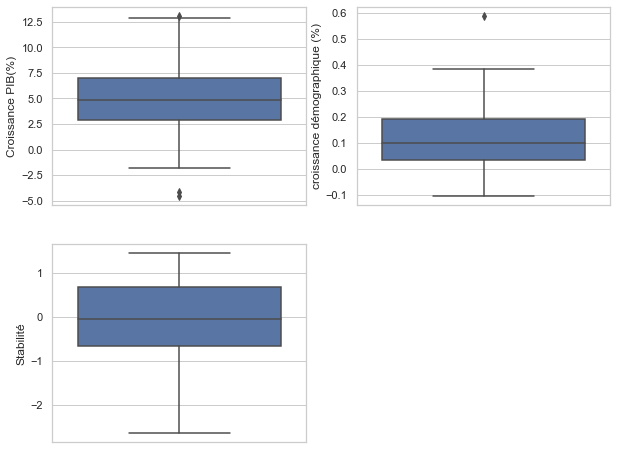

In [249]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df5,y='Croissance PIB(%)')
plt.subplot(222)
sns.boxplot(data=df5,y ='croissance démographique (%)')
plt.subplot(223)
sns.boxplot(data=df5,y= 'Stabilité')
plt.show()

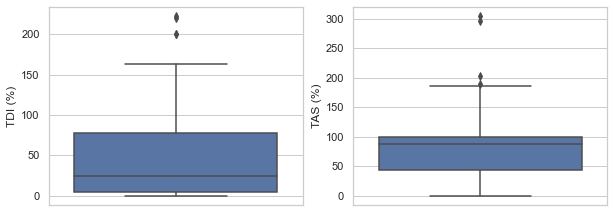

In [250]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df5,y='TDI (%)')
plt.subplot(222)
sns.boxplot(data=df5,y ='TAS (%)')

plt.show()

## On constate sur chaque vue qu'il existe quelques outliers qui ne sont pas en outre des valeurs abérrantes mais seulement des valeurs légèrement extrême qui ne vont pas interférer avec les analyses

### B/ Matrice des corrélations corrélation entre les variables

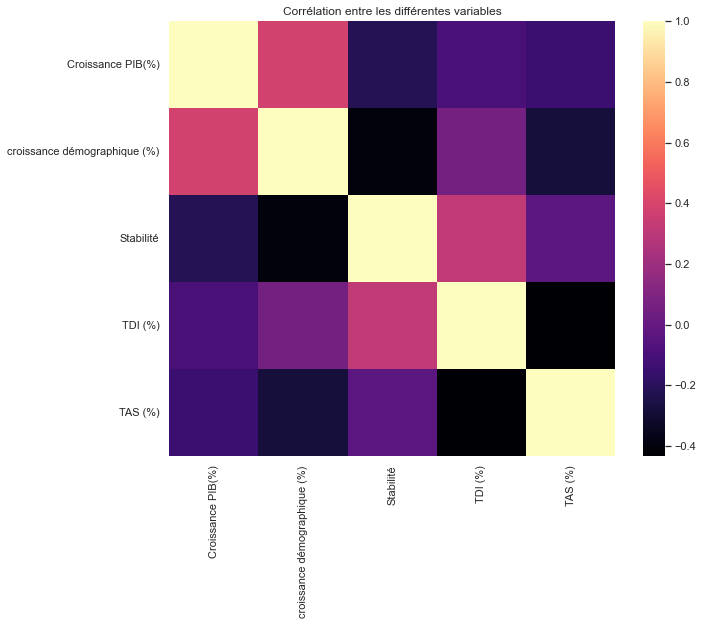

In [251]:
# heatmap de corrélations entre les différentes variables
plt.figure(figsize=(10, 8))
sns.heatmap(df5.corr(),cmap='magma')
plt.title('Corrélation entre les différentes variables')
plt.show()